# HR Analytics Dashboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

In [2]:
hr = pd.read_csv('HR.csv')

In [4]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
hr.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
Num_of_emp=hr['Age'].count()
Num_of_emp

1470

# Number of Emplyees

In [9]:
print(f'Number of employees: {Num_of_emp}')

Number of employees: 1470


In [10]:
num_of_attrition=hr['Attrition'].sum()

In [12]:
print(f'Number of Attrition: {num_of_attrition}')

Number of Attrition: 237


In [13]:
Active_emp=Num_of_emp-num_of_attrition

In [14]:
print(f'Number of Active Employees: {Active_emp}')

Number of Active Employees: 1233


In [15]:
MonthlyIncome=hr['MonthlyIncome'].sum()

In [16]:
print(f'MonthlyIncome: {MonthlyIncome}')

MonthlyIncome: 9559309


In [17]:
Average_AgeRate=hr['Age'].mean()

In [18]:
Average_AgeRate

36.923809523809524

<Axes: >

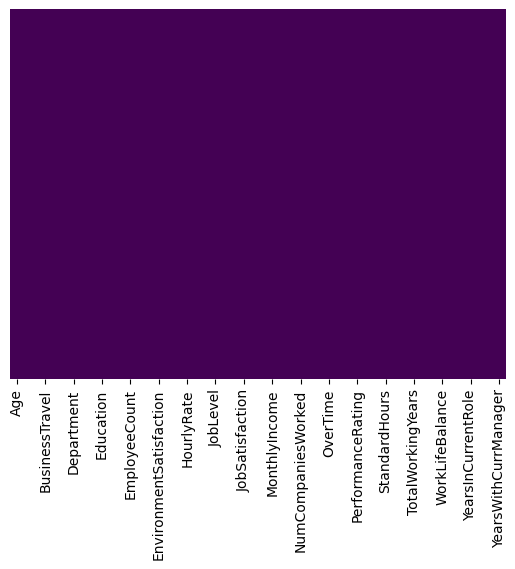

In [19]:
sns.heatmap(hr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Gender', ylabel='count'>

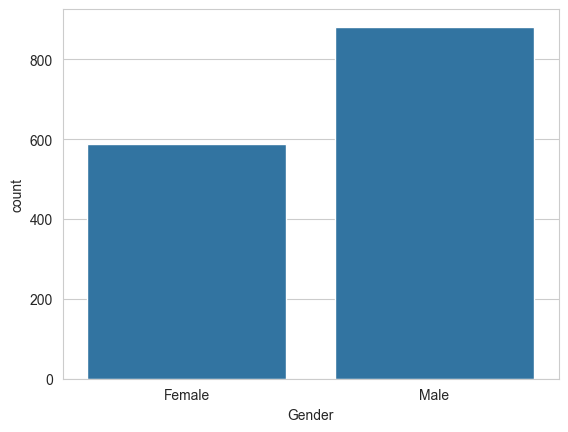

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Gender', data=hr)

<Axes: xlabel='Department', ylabel='count'>

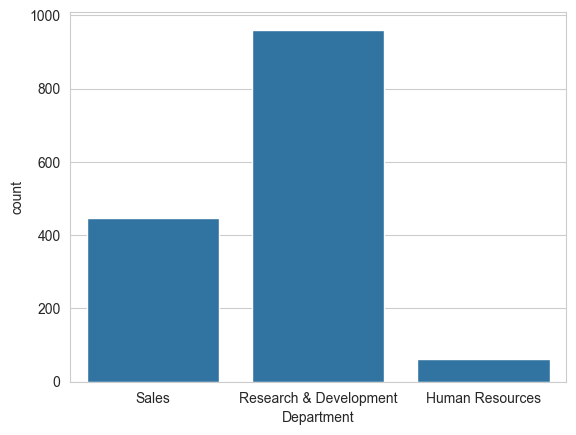

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Department',data=hr)

<Axes: >

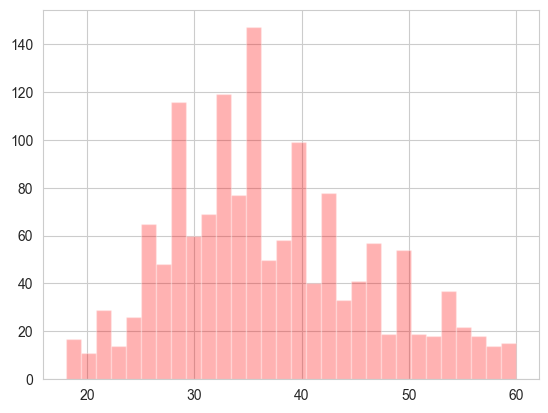

In [20]:
hr['Age'].hist(bins=30,color='red',alpha=0.3)

<Axes: xlabel='Department', ylabel='count'>

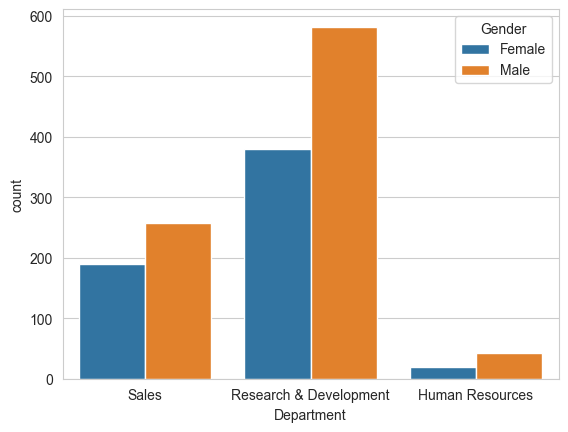

In [21]:
sns.countplot(x='Department', hue='Gender',data=hr)

<Axes: xlabel='Department', ylabel='count'>

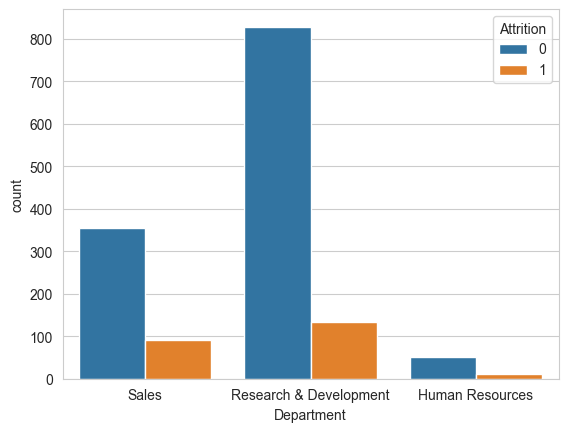

In [22]:
sns.countplot(x='Department',hue='Attrition',data=hr)

In [23]:
Department=hr['Department']
MonthlyIncome=hr['MonthlyIncome']

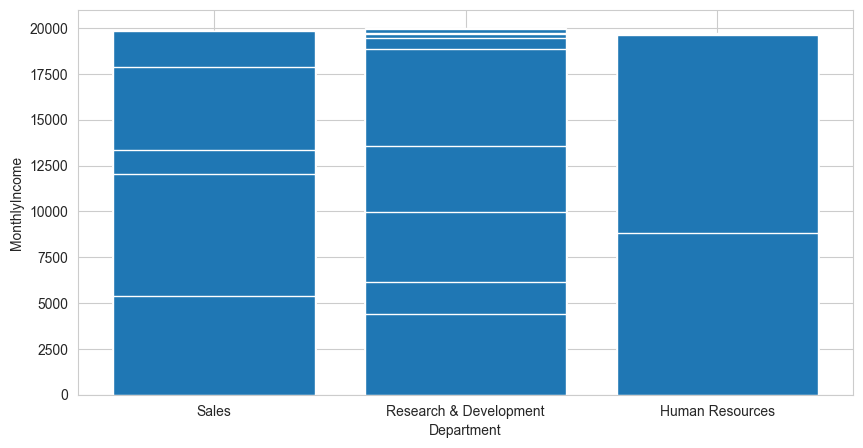

In [24]:
fig =plt.figure(figsize=(10,5))
plt.bar(Department,MonthlyIncome)
plt.xlabel('Department')
plt.ylabel('MonthlyIncome')

plt.show()

In [25]:
department_income = hr.groupby('Department')['MonthlyIncome'].sum().reset_index()

print(department_income)

               Department  MonthlyIncome
0         Human Resources         419234
1  Research & Development        6036284
2                   Sales        3103791


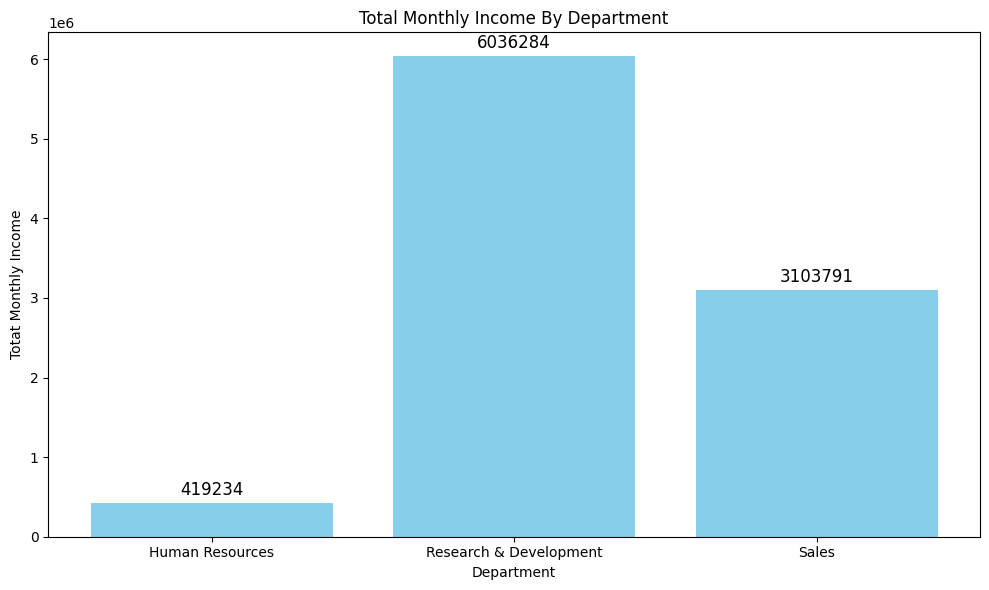

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data replace with your actual file path

# Group of department and sum of Monthly Income 
department_income = hr.groupby('Department')['MonthlyIncome'].sum().reset_index()

# Created Bar Chart

plt.figure(figsize=(10,6))
bars = plt.bar(department_income['Department'], department_income['MonthlyIncome'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Totat Monthly Income')
plt.title('Total Monthly Income By Department')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center',va='bottom',fontsize=12)
plt.tight_layout()
plt.show()


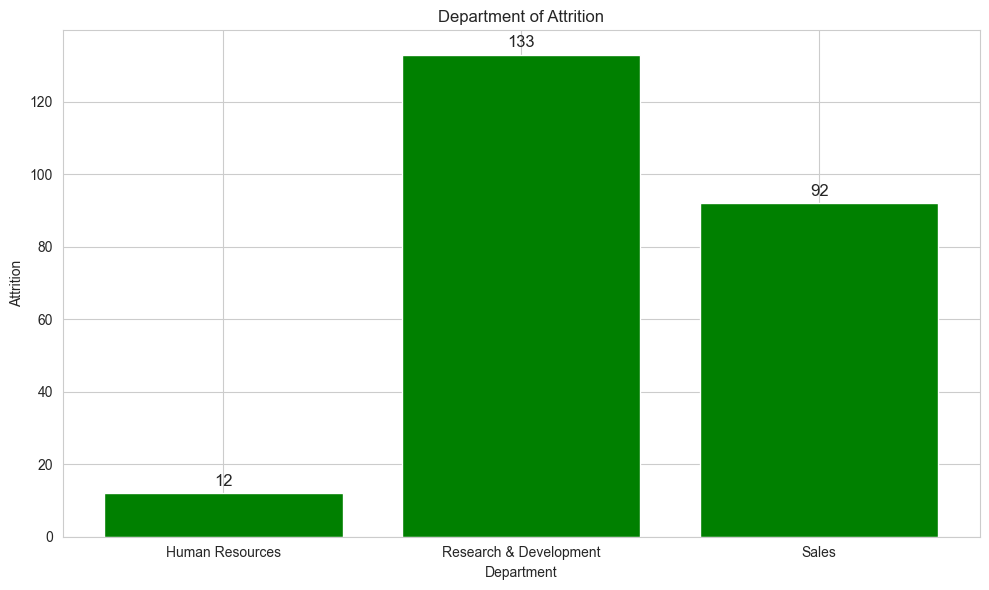

In [27]:
department_Attrition = hr.groupby('Department')['Attrition'].sum().reset_index()

# Created Bar Chart

plt.figure(figsize=(10,6))
bars = plt.bar(department_Attrition['Department'], department_Attrition['Attrition'], color='green')
plt.xlabel('Department')
plt.ylabel('Attrition')
plt.title('Department of Attrition')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center',va='bottom',fontsize=12)
plt.tight_layout()
plt.show()


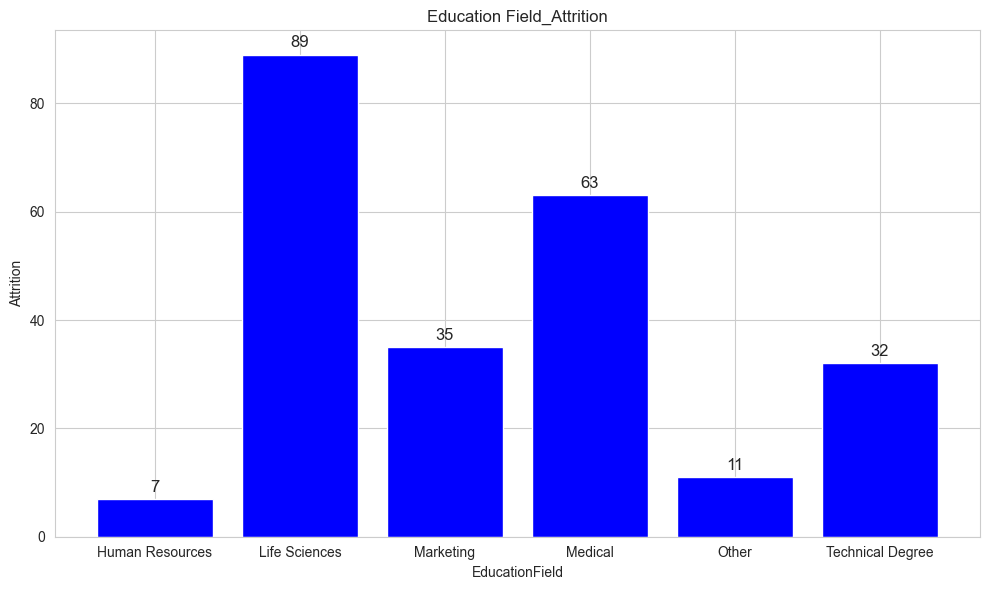

In [28]:
EducationField_Attrition = hr.groupby('EducationField')['Attrition'].sum().reset_index()

# Created Bar Chart

plt.figure(figsize=(10,6))
bars = plt.bar(EducationField_Attrition['EducationField'], EducationField_Attrition['Attrition'], color='blue')
plt.xlabel('EducationField')
plt.ylabel('Attrition')
plt.title('Education Field_Attrition')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center',va='bottom',fontsize=12)
plt.tight_layout()
plt.show()


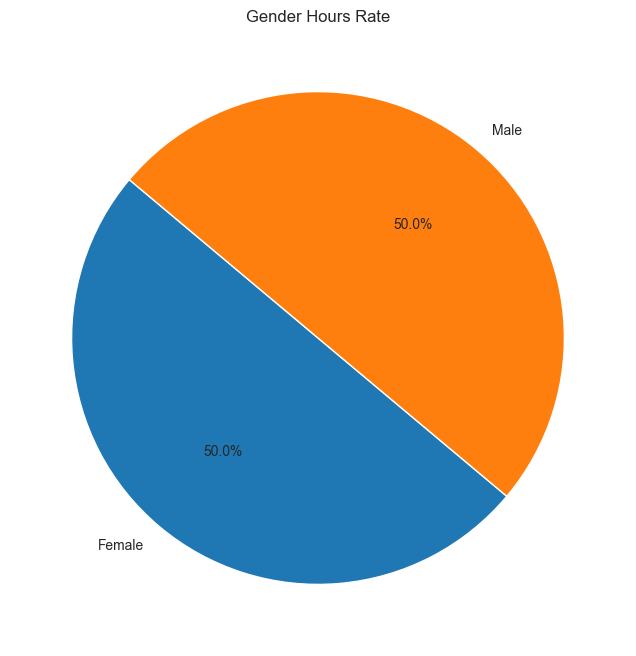

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

Gender_avg_hrsrate = hr.groupby('Gender')['HourlyRate'].mean()

# Create the pie Chart

plt.figure(figsize=(8,8))
plt.pie(Gender_avg_hrsrate, labels=Gender_avg_hrsrate.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Hours Rate')

plt.show()

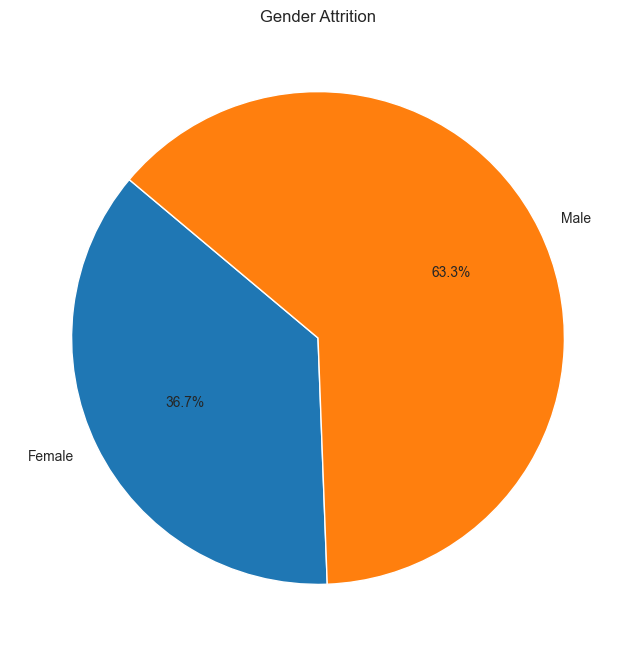

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

Gender_avg_attrition = hr.groupby('Gender')['Attrition'].sum()

# Create the pie Chart

plt.figure(figsize=(8,8))
plt.pie(Gender_avg_attrition, labels=Gender_avg_attrition.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Attrition')

plt.show()